In [1]:
import oci
import ads
from ads.feature_store.feature_group_expectation import ExpectationType
from ads.feature_store.feature_store import FeatureStore
from ads.feature_store.input_feature_detail import FeatureDetail, FeatureType
from ads.feature_store.statistics_config import StatisticsConfig
from ads.feature_store.transformation import TransformationMode

other_config = oci.config.from_file("~/.oci/config", "HARSANKA")

ads.set_auth(auth="api_key", client_kwargs={"service_endpoint": "http://localhost:21000/20230101"}, config=other_config)

compartmentId = "ocid1.tenancy.oc1..aaaaaaaa462hfhplpx652b32ix62xrdijppq2c7okwcqjlgrbknhgtj2kofa"
# registryId = "ocid1.dcmsregistry.oc1.iad.anuwcljtocamvlyagupcaxxr6fa6vwrb72hnbmeoarafrocl456mqsts43ja"
metastoreId = "ocid1.datacatalogmetastore.oc1.iad.amaaaaaaqc2qulqav5pzijun724nglvsent3634hqrc2ybu5vfi3fu35tkyq"

  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):

  if LooseVersion(pyarrow.__version__) < LooseVersion(minimum_pyarrow_version):

  LooseVersion(pyarrow.__version__) >= LooseVersion("2.0.0")

  warnings.warn(

  if LooseVersion(pd.__version__) >= LooseVersion("1.3.0"):

ERROR:logger:Please set env variable SPARK_VERSION
INFO:logger:Using deequ: com.amazon.deequ:deequ:1.2.2-spark-3.0


In [9]:
import pandas
df = pandas.read_parquet("https://objectstorage.us-ashburn-1.oraclecloud.com/p/tkOx6d7wYFBpfaAC3ok7PrBSzu8H5yqFvcwXm6vdcVFwe8kSSdtbeuSwjs0KlEA2/n/oraclegbuprod/b/energywater-datascience/o/featuresets/submeter_hems/21.12/0.1.0.parquet/part-00005-8870392f-906f-4779-9a67-d28aaa9cefe7-c000.snappy.parquet")

In [10]:
df

,submeter_hems_ee_site_id,submeter_hems_start,submeter_hems_period,submeter_hems_timeseries,submeter_hems_units
0,1706,1546300800,900,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...",KW
1,7746,1546300800,900,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...",KW


In [2]:
df.schema

AttributeError: 'DataFrame' object has no attribute 'schema'

In [3]:
# FeatureStore().list(compartment_id=compartmentId)

In [4]:
feature_store_resource = FeatureStore(). \
    with_description("Feature Store Description"). \
    with_compartment_id(compartmentId). \
    with_display_name("Bike feature store"). \
    with_offline_config(metastore_id=metastoreId)

feature_store = feature_store_resource.create()

In [18]:
entity = feature_store.create_entity("Bike Entity")
entity

kind: entity
spec:
  compartmentId: ocid1.tenancy.oc1..aaaaaaaa462hfhplpx652b32ix62xrdijppq2c7okwcqjlgrbknhgtj2kofa
  featureStoreId: 5901C0CF660E8F74FE575C9DB83A6B9E
  id: 5D6EF9A3A7B70711F62150193D3AF8A3
  name: Bike Entity
type: entity

,id,display_name,description,time_created,time_updated,lifecycle_state,created_by,compartment_id,feature_store_id
0,4134D70E8DD10FF1BA46FB098A14D8D7,entity_resource-moist-mallard-2023-05-12-14:58.58,None,2023-05-12 14:59:02,2023-05-12 14:59:02,ACTIVE,...5schaa,...j2kofa,CC6CF0258B71E8E80213D3809A5FD8BB
1,0E0987B23576BF68EAC43F98BB911B00,entity_resource-verifiable-vulture-2023-05-12-15:03.24,None,2023-05-12 15:03:28,2023-05-12 15:03:28,ACTIVE,...5schaa,...j2kofa,5885FF7838B14F25786256084D30B855
2,F24DD036922BA83CAFDA4022AB81250C,entity_resource-agitated-albatross-2023-05-12-15:09.18,None,2023-05-12 15:09:21,2023-05-12 15:09:21,ACTIVE,...5schaa,...j2kofa,BC863DB74B3BDC62C5C605CDDD7A4157
3,2E3D8C4C2CCC2A96E94DDB2EF4F787CF,entity_resource-voluminous-viper-2023-05-12-15:11.27,None,2023-05-12 15:11:32,2023-05-12 15:11:32,ACTIVE,...5schaa,...j2kofa,F4F29B488F92D38C1F05559E9B547C7B
4,CDB904923DFE16D03DB923DBFC7A500D,entity_resource-active-armadillo-2023-05-12-15:34.15,None,2023-05-12 15:34:18,2023-05-12 15:34:18,ACTIVE,...5schaa,...j2kofa,7E813A04E09D6EFABED5CAD3B0016FE2
5,D987BFD50452777E971B5CB8E3FA3526,entity_resource-incredible-ibis-2023-05-12-15:36.28,None,2023-05-12 15:36:33,2023-05-12 15:36:33,ACTIVE,...5schaa,...j2kofa,39A55562B85AEE63E6547634ABA6D283
6,9F3E18E960725DA8D0454D76EA391D00,entity_resource-feisty-fish-2023-05-12-15:56.21,None,2023-05-12 15:56:24,2023-05-12 15:56:24,ACTIVE,...5schaa,...j2kofa,5D32B794C908E333F34B1FA4896DA8B5
7,17FE1C9EFB62932ACDE23A5D81F22D07,Bike Entity,None,2023-05-12 16:02:23,2023-05-12 16:02:23,ACTIVE,...5schaa,...j2kofa,0B347D03F1DF19A97102444A4F34B77A
8,5D6EF9A3A7B70711F62150193D3AF8A3,Bike Entity,None,2023-05-12 17:32:37,2023-05-12 17:32:37,ACTIVE,...5schaa,...j2kofa,5901C0CF660E8F74FE575C9DB83A6B9E


In [6]:
def user_has_great_credit(credit_score_batch):
    credit_score_batch['User_Has_Good_Credit'] = credit_score_batch['credit_score'].apply(lambda x: 1 if x > 670 else 0)
    credit_score_batch.rename(columns={'date': 'Timestamp'}, inplace=True)
    result_df = credit_score_batch[['user_id', 'User_Has_Good_Credit', 'Timestamp']]
    return result_df

transformation_1 = feature_store.create_transformation(transformation_mode=TransformationMode.PANDAS,
                                                       source_code_func=user_has_great_credit,
                                                       display_name="user_has_great_credit")

In [7]:
input_feature_details = [
    FeatureDetail("user_id").with_feature_type(FeatureType.STRING).with_order_number(1),
    FeatureDetail("date").with_feature_type(FeatureType.STRING).with_order_number(2),
    FeatureDetail("credit_score").with_feature_type(FeatureType.STRING).with_order_number(3)
]

In [8]:
# Initialize Expectation Suite
# from great_expectations.core import ExpectationSuite, ExpectationConfiguration
#
# expectation_suite_trans = ExpectationSuite(expectation_suite_name="feature_definition")
# expectation_suite_trans.add_expectation(
#     ExpectationConfiguration(
#         expectation_type="EXPECT_COLUMN_VALUES_TO_NOT_BE_NULL",
#         kwargs={"column": "date"}
#     )
# )

stats_config = StatisticsConfig().with_is_enabled(False)
feature_group_resource = entity.create_feature_group(
    primary_keys=["User_id"],
    input_feature_details=input_feature_details,
    # expectation_suite=expectation_suite_trans,
    # expectation_type=ExpectationType.LENIENT,
    statistics_config=stats_config,
    name="bike_cycle_feature_group",
    transformation_id=transformation_1.id
)

In [9]:
feature_group_resource

kind: FeatureGroup
spec:
  compartmentId: ocid1.tenancy.oc1..aaaaaaaa462hfhplpx652b32ix62xrdijppq2c7okwcqjlgrbknhgtj2kofa
  entityId: 5D6EF9A3A7B70711F62150193D3AF8A3
  featureStoreId: 5901C0CF660E8F74FE575C9DB83A6B9E
  id: 35EB42B64BD3B623725B3B9ACF397B89
  inputFeatureDetails:
  - featureType: STRING
    name: user_id
    orderNumber: 1
  - featureType: STRING
    name: date
    orderNumber: 2
  - featureType: STRING
    name: credit_score
    orderNumber: 3
  name: bike_cycle_feature_group
  primaryKeys:
    items:
    - name: User_id
  statisticsConfig:
    isEnabled: false
  transformationId: F82256A77A02BC68BB45CA180847DE4B
type: featureGroup

In [10]:
# from ads.feature_store.feature_group import FeatureGroup
# import ads
# import oci
# other_config = oci.config.from_file("~/.oci/config", "HARSANKA")

# ads.set_auth(auth="api_key", client_kwargs={"service_endpoint": "http://localhost:21000/20230101"}, config=other_config)

# fg1 = FeatureGroup.from_id("41FFB439A62AB3222E06A96F7E8FEE7C")

In [11]:
import warnings
warnings.filterwarnings('ignore')

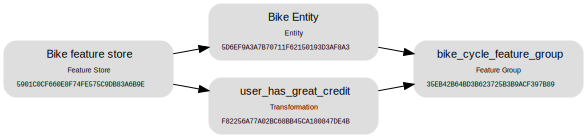

In [12]:
feature_group_resource.show()

In [13]:
from ads.feature_store.dataset import Dataset

dataset_resource = (
            Dataset()
            .with_description("dataset description")
            .with_compartment_id(compartmentId)
            .with_name("bike_dataset")
            .with_entity_id(entity.id)
            .with_feature_store_id(feature_store.id)
            .with_query(f"SELECT * FROM `{entity.id}`.{fg1.name}")
)

In [15]:
dataset_resource.create()

kind: Dataset
spec:
  compartmentId: ocid1.tenancy.oc1..aaaaaaaa462hfhplpx652b32ix62xrdijppq2c7okwcqjlgrbknhgtj2kofa
  description: dataset description
  entityId: 5D6EF9A3A7B70711F62150193D3AF8A3
  featureStoreId: 5901C0CF660E8F74FE575C9DB83A6B9E
  id: 5C6CF2B4777572F674343F9734E67673
  name: bike_dataset
  query: SELECT * FROM `5D6EF9A3A7B70711F62150193D3AF8A3`.bike_cycle_feature_group
  statisticsConfig:
    isEnabled: true
type: dataset

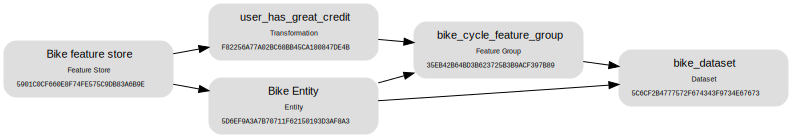

In [16]:
dataset_resource.show()